In [ ]:
import datetime as dt
from collections import OrderedDict
import sys, os
import dateutil.relativedelta as rd
import json
from pathlib import Path

import utm
import pandas as pd
import numpy as np
import shapely.geometry as sg
import shapely.ops as so

DIR = Path('..')
sys.path.append(str(DIR))

import gtfs_kit as gk

%load_ext autoreload
%autoreload 2

DATA_DIR = DIR/'data'

In [2]:
path = DATA_DIR/'cairns_gtfs.zip'
feed = gk.read_gtfs(path, dist_units='km')


In [25]:
route_ids = feed.routes.route_id.loc[:1]
%time g = feed.geometrize_routes(route_ids, split_directions=True)
display(g)
type(g), g.crs

CPU times: user 104 ms, sys: 4 ms, total: 108 ms
Wall time: 109 ms


,route_id,direction_id,geometry
0,110-423,0,"(LINESTRING (145.664847 -16.74631, 145.667393 ..."
1,110-423,1,"(LINESTRING (145.778501 -16.9205, 145.7784 -16..."
2,110N-423,0,"(LINESTRING (145.664847 -16.74631, 145.667393 ..."
3,110N-423,1,"(LINESTRING (145.778501 -16.9205, 145.7784 -16..."


(geopandas.geodataframe.GeoDataFrame, {'init': 'epsg:4326'})

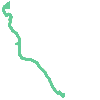

In [17]:
g.geometry.iat[1]

In [ ]:
# Slicing 
display(fts.loc[:, ("num_trips", slice(None))])
display(fts.xs("num_trips", axis="columns"))

In [ ]:
f = fts = feed.compute_feed_time_series(trip_stats, dates[:1], freq="12H", split_route_types=False)
display(f)
g = gk.unstack_time_series(f)

# columns = [c for c in g.columns if c not in ["datetime", "value"]]
# h = g.pivot_table(index="datetime", columns=columns).value.sort_index(
#     axis="columns"
# )

# hours = (h.index[1] - h.index[0]).components.hours
# if hours != 0:
#     freqy = f"{hours}H"
# else:
#     freqy = "D"

# print(freqy)

h = gk.restack_time_series(g)
h

In [ ]:
f.index

In [ ]:
delta.components.hours

In [ ]:
feed1 = feed.copy()
cal = feed1.calendar.copy()
cal["monday"] = 0
feed1.calendar = cal
feed1.compute_feed_time_series(trip_stats, dates, freq="12H")

In [ ]:
s1 = pd.Series({"hello": 12, "goodbye": 13})
s2 = s1.copy()
pd.DataFrame([s1, s2])

In [ ]:
feed.compute_stop_stats(['20140601', '20140603'])

In [ ]:
trip_stats = feed.compute_trip_stats()
feed = feed.append_dist_to_stop_times(trip_stats)

# Load screen line
with (DATA_DIR/'cairns_screen_line.geojson').open() as src:
    line = json.load(src)
    line = sg.shape(line['features'][0]['geometry'])



In [ ]:
f = feed.compute_screen_line_counts(line, dates[:7])
f[f['crossing_time'] < '06:00:00']

In [ ]:
feed.compute_feed_time_series(ts, dates[-2:], freq='12H')

In [ ]:
sd = False
#%time p1 = proto1(feed, ts, dates[:14], split_directions=sd)
%time p2 = proto2(feed, [dates[0], '20010101'], split_directions=sd, freq='12H')
p2

In [ ]:
feed.compute_feed_stats(ts, dates[0])

In [ ]:
feed.describe()

In [ ]:
feed.summarize()